This code extends the previous code by incorporating the Analytic Hierarchy Process (AHP) methodology into the Multi-Attribute Utility Theory (MAUT) analysis. AHP is a decision-making technique that involves pairwise comparisons of criteria to determine their relative importance. The code first reads an Excel file containing the data and performs data preprocessing, including removing unnecessary rows and columns and renaming the columns. It then applies Min-Max normalization to the numeric columns.

Next, a pairwise comparison matrix is defined for the criteria, representing the relative importance of each criterion compared to others. Weight calculation is performed based on the matrix to determine the weights for each criterion. These weights are then assigned to the attributes in the dataset.

Weighted scores are calculated for each attribute by multiplying the attribute values with their corresponding weights. An overall score is computed by summing the weighted scores. The options are ranked based on the overall scores, and the ranked options are saved to a CSV file.

Additionally, the code abbreviates the vendor names for better readability and saves the updated ranked options to a CSV file. Finally, a utility curve is plotted using Matplotlib to visualize the relationship between vendors and their utility scores. The utility curve assists in understanding the relative performance of different vendors and facilitates decision-making.

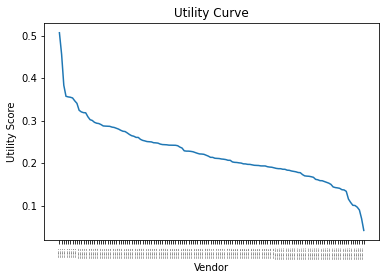

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Convert the data to CSV format
data.to_csv('Consolidated data_normalized.csv', index=False)

# Read the normalized CSV file
data = pd.read_csv('Consolidated data_normalized.csv')

# Define the pairwise comparison matrix for criteria
criteria_matrix = np.array([
    [1, 3, 5, 3, 7, 9, 5, 7, 3],  # IRR compared to other criteria
    [1/3, 1, 3, 3, 7, 7, 5, 7, 3],  # Strategic fit compared to other criteria
    [1/5, 1/3, 1, 1/3, 3, 3, 3, 5, 1],  # Technical Feasibility compared to other criteria
    [1/3, 1/3, 3, 1, 5, 7, 5, 7, 3],  # Uniqueness of R&D compared to other criteria
    [1/7, 1/7, 1/3, 1/5, 1, 3, 3, 5, 1],  # Reputational risk compared to other criteria
    [1/9, 1/7, 1/3, 1/7, 1/3, 1, 1/3, 1, 1/3],  # Market and Business risk compared to other criteria
    [1/5, 1/5, 1/3, 1/5, 1/3, 3, 1, 3, 1/3],  # Scalability compared to other criteria
    [1/7, 1/7, 1/5, 1/7, 1/5, 1, 1/3, 1, 1/5],  # Regulatory risk compared to other criteria
    [1/3, 1/3, 1, 1/3, 1, 3, 3, 5, 1]  # Market factors compared to other criteria
])

# Perform weight calculation
weights = np.power(np.prod(criteria_matrix, axis=1), 1 / criteria_matrix.shape[0])
weights = weights / np.sum(weights)

# Assign the calculated weights to the attributes
weights_dict = dict(zip(data.columns[3:12], weights))

# Calculate weighted scores for each attribute
for attribute in weights_dict:
    data[attribute + '_weighted'] = data[attribute] * weights_dict[attribute]

# Calculate overall scores
data['overall_score'] = data.filter(like='_weighted').sum(axis=1)

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Save ranked options to CSV
ranked_data[['Company', 'overall_score']].to_csv('Ranked Options.csv', index=False)
output = pd.read_csv('Ranked Options.csv')
output

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('Ranked Options.csv', index=False)
output = pd.read_csv('Ranked Options.csv')

# # Plot utility curve
# plt.plot(output['Abbreviated Vendor'], output['overall_score'])
# plt.xlabel('Vendor')
# plt.ylabel('Utility Score')
# plt.title('Utility Curve')
# plt.xticks(rotation=90)
# plt.show()
# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90,fontsize=2)
plt.show()

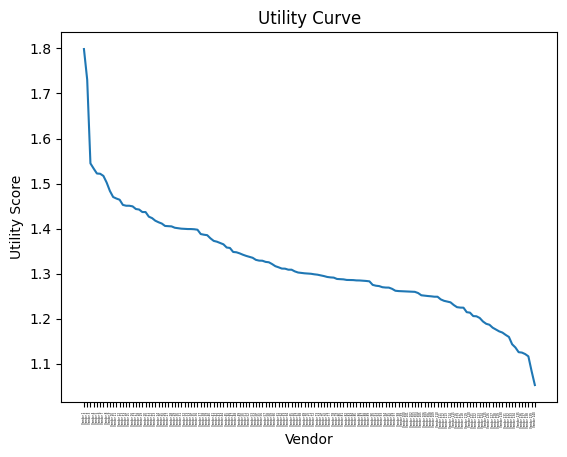

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assign weights to each attribute
weights = {
    'IRR': 0.2,
    'Strategic fit': 0.1,
    'Technical Feasibility': 0.15,
    'Uniqueness of R&D': 0.1,
    'Reputational risk': 0.1,
    'Market and Business risk': 0.1,
    'Scalability': 0.1,
    'Regulatory risk': 0.1,
    'Market factors': 0.05
}

# Calculate weighted scores for each attribute
for attribute in weights:
    data[attribute + '_weighted'] = data[attribute] * weights[attribute]

# Calculate overall scores
data['overall_score'] = data.filter(like='_weighted').sum(axis=1)

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('Options.csv', index=False)
output = pd.read_csv('Options.csv')

# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90,fontsize=2)
plt.show()


In [ ]:
# exponential